### Importing Libaries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

### Loading Data

In [2]:
df = pd.read_csv("./Online Retail Data Set.csv", encoding="unicode_escape")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Data Preprocessing

In [5]:
# Checking for duplicates
df.duplicated().sum()

5268

In [6]:
# Removing Duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [7]:
# Checking for Null Values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [8]:
# Handling missing values of "Description", setting it to "No Description"
df["Description"].fillna("No Description", inplace=True)

# Removing all missing values of "CustomerID" as "CustomerID" are unique for each customer
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
# Encoding categorical variable using Dummy Coding
category_columns = ["StockCode"]
df_encoded = pd.get_dummies(df, columns=category_columns)

In [10]:
# Feature scaling using Standard Scaler
numerical_columns = ["Quantity", "UnitPrice"]
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [11]:
# Dimensionality reduction
pca = PCA(n_components=2, random_state=42)
df_encoded = df_encoded.drop(["InvoiceNo", "Description", "CustomerID", "Country", "InvoiceDate"], axis=1)
df_redued = pca.fit_transform(df_encoded)

In [12]:
# # Finding out the optimal number for n_components of PCA
# # Fitting PCA to the df_encoded
# pca = PCA(random_state=42)
# pca.fit(df_encoded)

# # Plotting the cumulative explained variance ratio
# plt.figure(figsize=(10, 6))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance Ratio')
# plt.title('Explained Variance Ratio vs. Number of Components')
# plt.grid(True)
# plt.show()

### Exploratory Data Analysis (EDA)

In [13]:
# Statistical analysis
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  401604.000000  401604.000000  401604.000000
mean       12.183273       3.474064   15281.160818
std       250.283037      69.764035    1714.006089
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13939.000000
50%         5.000000       1.950000   15145.000000
75%        12.000000       3.750000   16784.000000
max     80995.000000   38970.000000   18287.000000


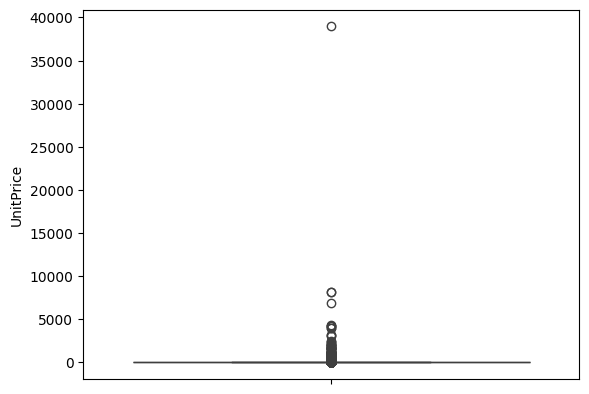

In [14]:
# Boxplot of UnitPrice
sns.boxplot(y="UnitPrice", data=df)
plt.show()

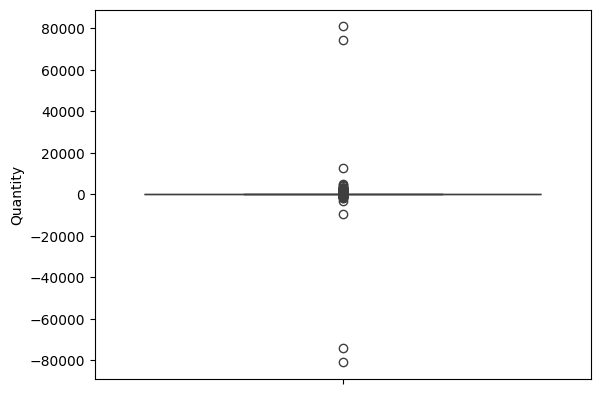

In [15]:
# Boxplot of UnitPrice
sns.boxplot(y="Quantity", data=df)
plt.show()

In [16]:
# sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

### Machine learning Model

In [17]:
# Creating feature matrix X and target variable y
# Randomly selecting 20000 data points as there is not enough RAM
df_sampled = df.sample(n=20000, random_state=42)

# Encoding categorical variables
category_columns = ["StockCode"]
df_encoded = pd.get_dummies(df_sampled, columns=category_columns)

# Feature scaling
numerical_columns = ["Quantity", "UnitPrice"]
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Dimensionality reduction
pca = PCA(n_components=2, random_state=42)
df_reduced = pca.fit_transform(df_encoded.drop(["InvoiceNo", "Description", "CustomerID", "Country", "InvoiceDate"], axis=1))

# Creating feature matrix X and target variable y
label_encoder = LabelEncoder()
X = df_reduced
y = df_sampled["Country"]
y = y.reset_index(drop=True)
y = label_encoder.fit_transform(y)

print(X.shape, y.shape)

(20000, 2) (20000,)


**Choice of Target Variable**: Among the available variables in the dataset, the "Country" seems to be the most relevant choice for predicting customer behavior or transaction patterns. Each transaction is associated with a country, indicating where the purchase was made or where the customer is located. So predicting this variable could help us in understanding the geographical patterns in customer behavior, which could inform various business strategies.

In [18]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# # Training the Model using Random Forest Classifier
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)

In [20]:
class RandomForestClassifierScratch:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.estimators = []
        self.selected_features = []  

    def fit(self, X, y):
        n_samples, n_features = X.shape
        for _ in range(self.n_estimators):
            # Bootstrap sampling
            idx = np.random.choice(n_samples, size=n_samples, replace=True)
            X_bootstrap = X[idx]
            y_bootstrap = y[idx]
            
            # Random feature selection
            idx_features = np.random.choice(n_features, size=int(np.sqrt(n_features)), replace=False)
            self.selected_features.append(idx_features) 
            X_bootstrap = X_bootstrap[:, idx_features]
            
            # Training decision tree
            tree = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_split=self.min_samples_split,
                                           min_samples_leaf=self.min_samples_leaf)
            tree.fit(X_bootstrap, y_bootstrap)
            self.estimators.append(tree)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.estimators)), dtype=int)
        for i, tree in enumerate(self.estimators):
            idx_features = self.selected_features[i]
            predictions[:, i] = tree.predict(X[:, idx_features])
        return np.array([np.argmax(np.bincount(row)) for row in predictions])


clf = RandomForestClassifierScratch()
clf.fit(X_train, y_train)

In [21]:
# Evaluating the Model using Accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the Model: {accuracy:.2f}" )

The accuracy of the Model: 0.85


In [22]:
# Evaluating the Model using Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("The Confusion matrix of the Model:", confusion_mat)

The Confusion matrix of the Model: [[   0    0    0 ...    0   15    0]
 [   0    0    0 ...    0    1    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    1    0]
 [   3    0    1 ...    0 3391    0]
 [   0    0    0 ...    0    2    0]]


In [23]:
# Evaluating the Model using Classification Report
y_test = label_encoder.inverse_transform(y_test)
y_pred = label_encoder.inverse_transform(y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)
print("The Classification Report of the Model:", classification_rep)

The Classification Report of the Model:                       precision    recall  f1-score   support

           Australia       0.00      0.00      1.00        16
             Austria       1.00      0.00      0.00         2
             Bahrain       0.00      1.00      0.00         0
             Belgium       0.00      0.00      1.00        15
              Canada       1.00      0.00      0.00         1
     Channel Islands       0.00      0.00      1.00         9
              Cyprus       0.00      0.00      1.00         7
      Czech Republic       1.00      0.00      0.00         1
             Denmark       0.00      0.00      1.00         5
                EIRE       0.04      0.03      0.03        72
  European Community       0.00      0.00      1.00         1
             Finland       0.00      0.00      1.00         6
              France       0.12      0.09      0.10        78
             Germany       0.09      0.06      0.07        87
              Greece       1.

### Visualizing the results of the model

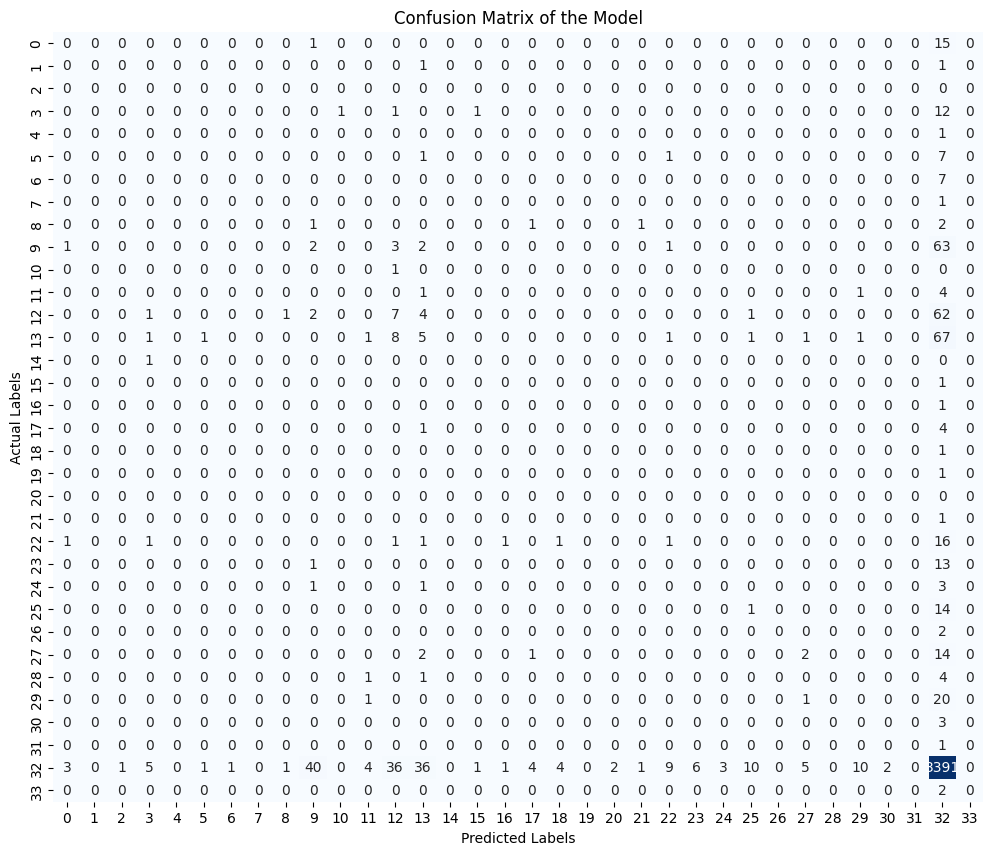

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix of the Model")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

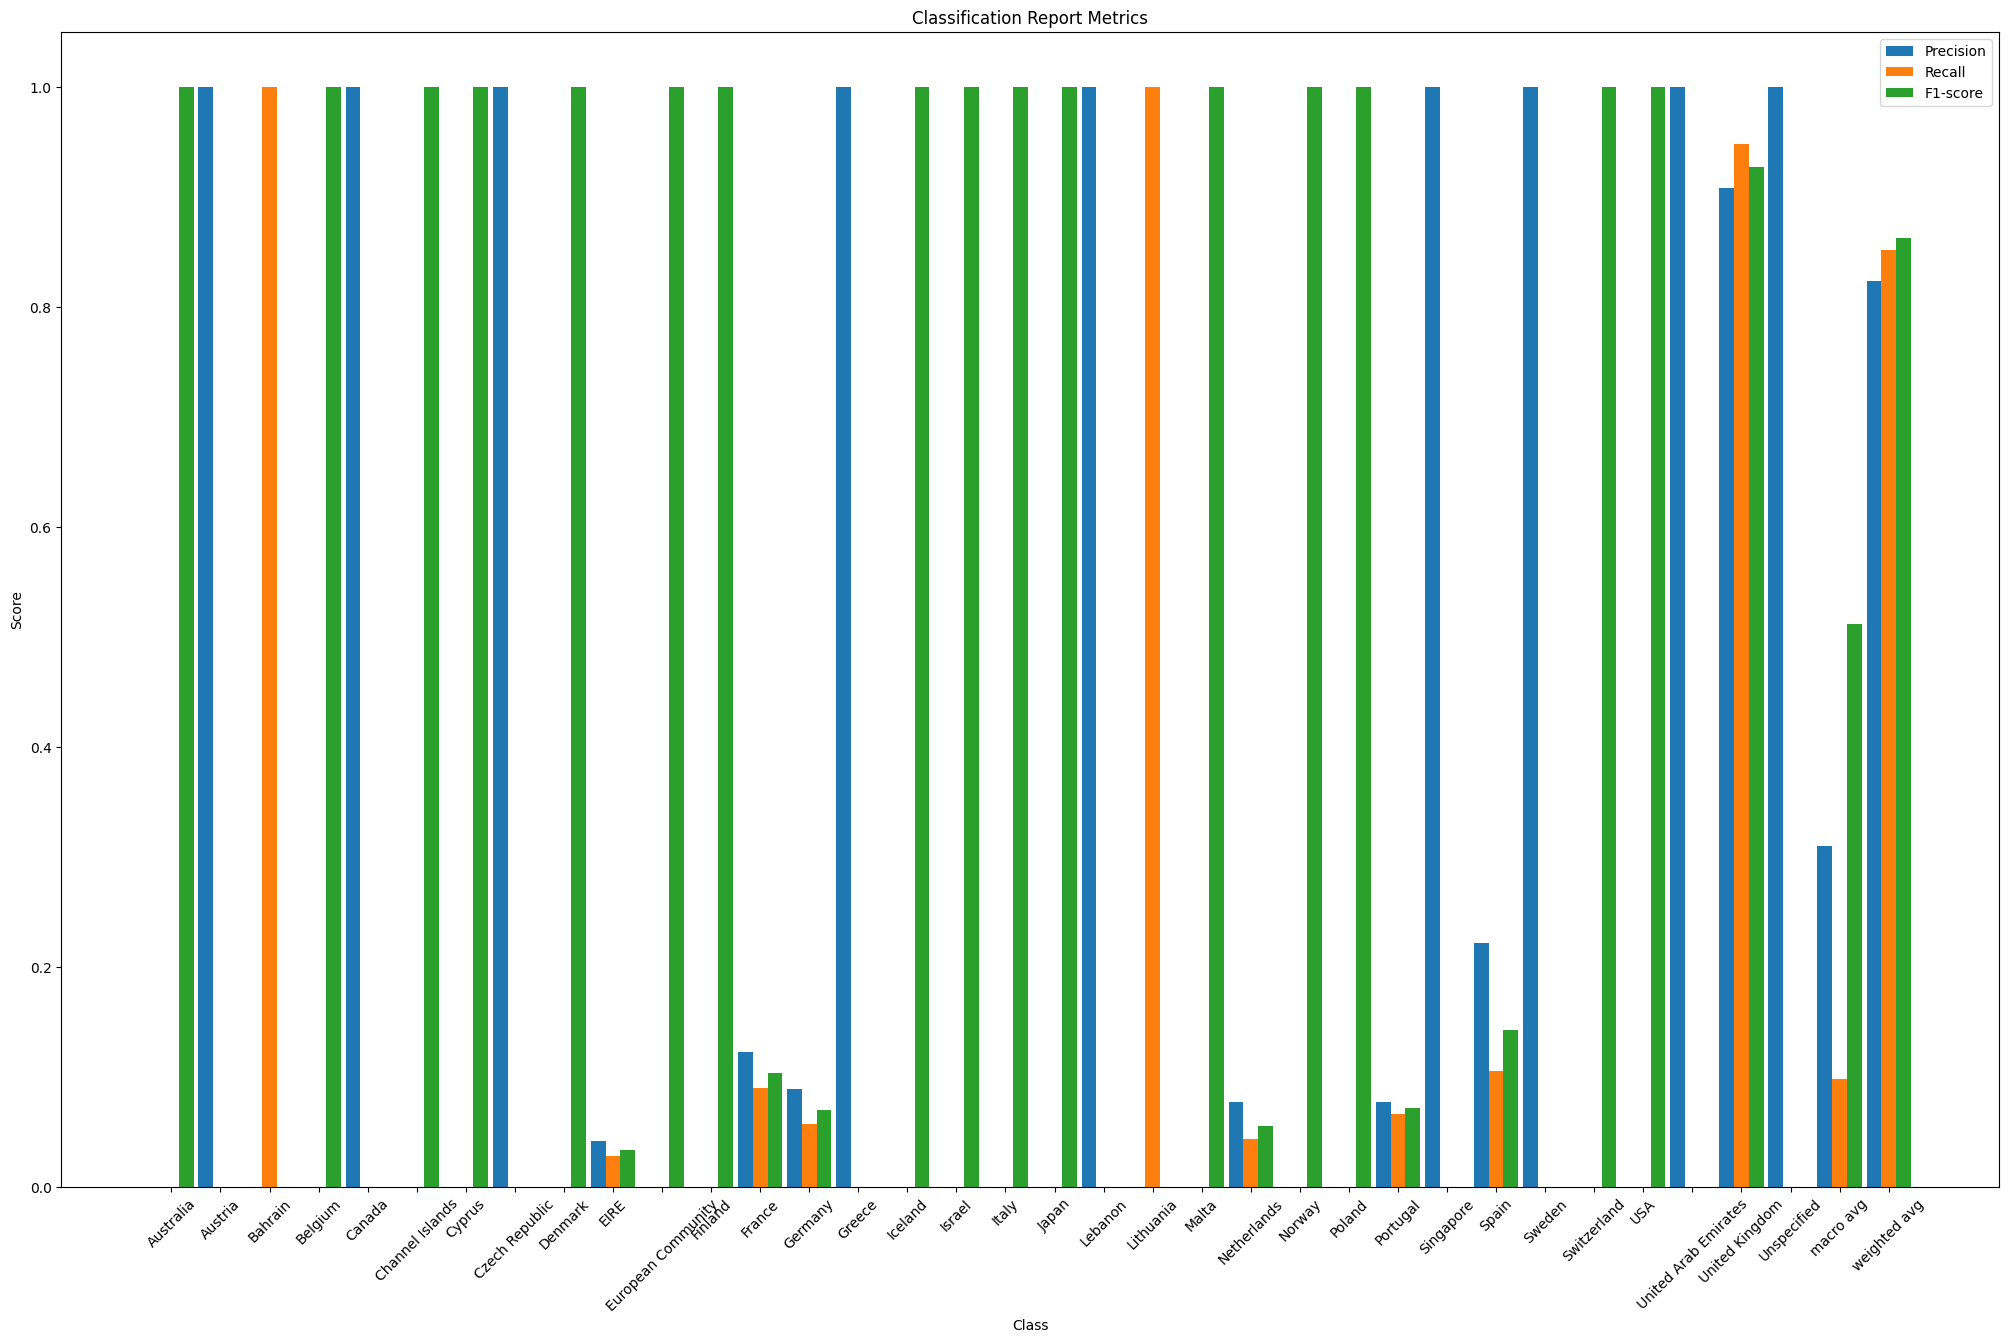

In [25]:
classification_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

# Extracting precision, recall, and f1-score for each class
precision = [classification_dict[label]['precision'] for label in classification_dict.keys() if label != 'accuracy']
recall = [classification_dict[label]['recall'] for label in classification_dict.keys() if label != 'accuracy']
f1_score = [classification_dict[label]['f1-score'] for label in classification_dict.keys() if label != 'accuracy']
labels = [label for label in classification_dict.keys() if label != 'accuracy']

# Plotting precision, recall, and f1-score for each class
plt.figure(figsize=(25, 15))
x = np.arange(len(labels))
width = 0.3
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1-score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Report Metrics')
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.show()